In [7]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe' 
pd.set_option('mode.chained_assignment', None)
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [8]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install sqlalchemy psycopg2


In [10]:
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:Istemi2225@@localhost:5432/citi_bike')

In [11]:
query="""
SELECT * from jan_2020 union all
select * from feb_2020 union all
select * from mar_2020 union all
select * from apr_2020 union all
select * from may_2020 union all
select * from jun_2020 union all
select * from july_2020 union all
select * from aug_2020 union all
select * from sep_2020 union all
select * from oct_2020 union all
select * from nov_2020 union all
select * from dec_2020 """
bike_data = pd.read_sql_query(query,con=engine)
bike_data

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,226,2020-01-01 00:04:50.1920,2020-01-01 00:08:37.0370,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,2020-01-01 00:16:01.6700,2020-01-01 00:22:19.0800,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,2020-01-01 00:17:33.8770,2020-01-01 00:22:22.4420,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,2020-01-01 00:32:05.9020,2020-01-01 00:39:21.0660,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,2020-01-01 00:46:19.6780,2020-01-01 00:50:11.3440,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336797,1750,2020-12-31 23:07:44.0030,2020-12-31 23:36:54.4710,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0
336798,1519,2020-12-31 23:18:00.2630,2020-12-31 23:43:19.8590,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0
336799,1761,2020-12-31 23:31:09.4620,2021-01-01 00:00:31.3290,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1
336800,637,2020-12-31 23:35:45.4640,2020-12-31 23:46:22.7300,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0


In [12]:
#bike_data.to_csv('df_merged.csv',index=False)

In [13]:
print ('Shape dataset')
print (bike_data.shape)
print ('\n')
print ('Info Dataset')
print (bike_data.info())
print ('\n')
print ('See if any missing value of Dataset')
print (bike_data.isna().sum())

Shape dataset
(336802, 15)


Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336802 entries, 0 to 336801
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   tripduration             336802 non-null  int64  
 1   starttime                336802 non-null  object 
 2   stoptime                 336802 non-null  object 
 3   start_station_id         336802 non-null  object 
 4   start_station_name       336802 non-null  object 
 5   start_station_latitude   336802 non-null  float64
 6   start_station_longitude  336802 non-null  float64
 7   end_station_id           336802 non-null  object 
 8   end_station_name         336802 non-null  object 
 9   end_station_latitude     336802 non-null  float64
 10  end_station_longitude    336802 non-null  float64
 11  bikeid                   336802 non-null  object 
 12  usertype                 336802 non-null  object 
 13  birth_year       

In [14]:
bike_data['gender'] = bike_data['gender'].astype(str)

In [15]:
bike_data['starttime'] = pd.to_datetime(bike_data['starttime'])
bike_data['stoptime'] = pd.to_datetime(bike_data['stoptime'])

In [16]:
#Ensure data is formatted correctly to avoid errors in the visuals
bike_data['start_station_name'] = bike_data['start_station_name'].astype('category')
bike_data['end_station_name'] = bike_data['end_station_name'].astype('category')
bike_data['usertype'] = bike_data['usertype'].astype('category')
bike_data['gender'] = bike_data['gender'].astype('category')


In [17]:
# Numeric values
bike_data.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
tripduration,336802.0,1574.704939,18024.772149,61.000000,326.000000,615.000000,1416.000000,3.261756e+06
start_station_latitude,336802.0,40.722216,0.007351,40.709651,40.716870,40.721124,40.727224,4.074872e+01
start_station_longitude,336802.0,-74.046752,0.011905,-74.083639,-74.051789,-74.043991,-74.037683,-7.403211e+01
end_station_latitude,336802.0,40.721736,0.099504,0.000000,40.716870,40.721124,40.727224,4.084828e+01
end_station_longitude,336802.0,-74.045932,0.180828,-74.083639,-74.050656,-74.043845,-74.037683,0.000000e+00


In [18]:
bike_data.describe(include='O').T

,count,unique,top,freq
start_station_id,336802,52,3186,22930
end_station_id,336802,131,3186,26192
bikeid,336802,1846,42112,799
birth_year,336802,70,1969,52547


In [19]:
bike_data['start_station_name'].value_counts()

Grove St PATH                 22930
Newport Pkwy                  19844
Liberty Light Rail            16933
Hamilton Park                 14718
Sip Ave                       13663
Marin Light Rail              13615
Newport PATH                  12855
Harborside                    12757
Columbus Dr at Exchange Pl    12586
JC Medical Center             10795
City Hall                      9715
Morris Canal                   9209
Warren St                      9177
Washington St                  8855
Paulus Hook                    8069
Newark Ave                     7872
Van Vorst Park                 7301
Columbus Drive                 7285
Jersey & 3rd                   6075
McGinley Square                5732
Brunswick St                   5485
Brunswick & 6th                5483
Jersey & 6th St                5388
Manila & 1st                   5346
Lincoln Park                   5339
Grand St                       5165
Baldwin at Montgomery          4865
Dixon Mills                 

In [20]:
# Let's extract new columns (day of the week, day of the month, hour, month, season, year etc.) by using new index.
bike_data['Date'] = pd.to_datetime(bike_data['starttime'])
bike_data['Year'] = bike_data['starttime'].dt.year
bike_data['Month'] = bike_data['starttime'].dt.month
bike_data['Day'] = bike_data['starttime'].dt.day
bike_data.tail()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Date,Year,Month,Day
336797,1750,2020-12-31 23:07:44.003,2020-12-31 23:36:54.471,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0,2020-12-31 23:07:44.003,2020,12,31
336798,1519,2020-12-31 23:18:00.263,2020-12-31 23:43:19.859,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0,2020-12-31 23:18:00.263,2020,12,31
336799,1761,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1,2020-12-31 23:31:09.462,2020,12,31
336800,637,2020-12-31 23:35:45.464,2020-12-31 23:46:22.730,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0,2020-12-31 23:35:45.464,2020,12,31
336801,1607,2020-12-31 23:48:34.575,2021-01-01 00:15:22.309,3267,Morris Canal,40.712419,-74.038526,3267,Morris Canal,40.712419,-74.038526,48742,Subscriber,1982,1,2020-12-31 23:48:34.575,2020,12,31


In [21]:
bike_data.groupby(['usertype'])['tripduration'].sum()

usertype
Customer      338741126
Subscriber    191622647
Name: tripduration, dtype: int64

<AxesSubplot:xlabel='usertype'>

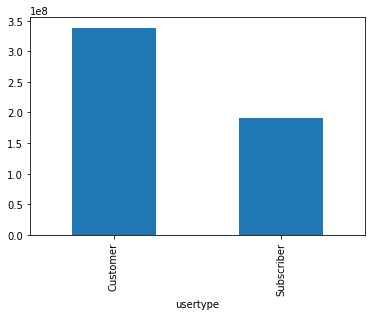

In [22]:
bike_data.groupby('usertype').tripduration.sum().plot.bar()

In [23]:
bike_data.usertype.value_counts()

Subscriber    231531
Customer      105271
Name: usertype, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


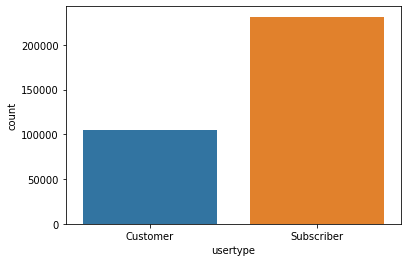

In [24]:
print(sns.countplot(x="usertype", data=bike_data));

Despite subscriber numbers being more than the casual users, by minute casual users have used more Citi Bikes

In [25]:
df_grouped = bike_data.groupby(by=[pd.Grouper(key="Date", freq="1M"), "usertype"])["tripduration"]
df_grouped = df_grouped.sum().reset_index()

In [26]:
fig = px.bar(df_grouped, x="Date", y="tripduration", color="usertype",text="tripduration")
fig.show()

January and February are the only two months that have the higher member usage. In other months casual riders were the largest chunk of riders using Citi Bike.

customer = non-subscribers

In [27]:
#Data for Top 10 Stations visual
top10 = pd.DataFrame()
top10['Station']=bike_data['start_station_name'].value_counts().head(10).index
top10['Number of Starts']=bike_data['start_station_name'].value_counts().head(10).values
top10['Station'] = top10['Station'].cat.remove_unused_categories()
top10['Station'] = top10['Station'].astype('object')

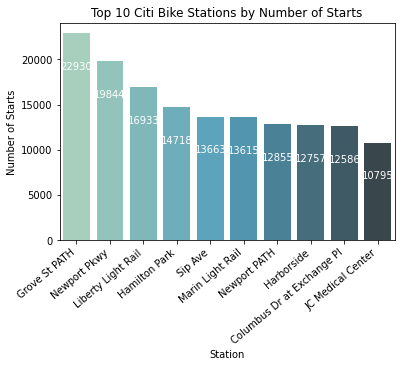

In [28]:
# Top 10 Stations
ax = sns.barplot('Station', 'Number of Starts', data = top10, palette="GnBu_d")
ax.set_title('Top 10 Citi Bike Stations by Number of Starts', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top10.iterrows():
    ax.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show();

AxesSubplot(0.125,0.125;0.775x0.755)


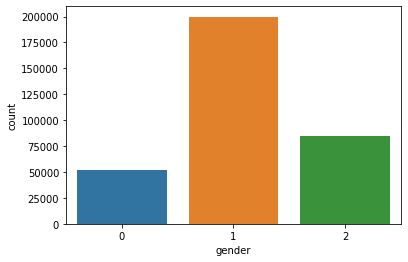

In [29]:
#gender distribution
# 0 = unknown 
# 1 = male 
# 2 = female
print(sns.countplot(x="gender", data=bike_data));

In [30]:
bike_data['birth_year'].value_counts(ascending=True)

1920        1
1938        1
1942        1
1939        2
1945        2
        ...  
1988    14540
1991    14910
1990    15419
1989    16906
1969    52547
Name: birth_year, Length: 70, dtype: int64

In [31]:
bike_data['trip_length_minute'] = round(bike_data['tripduration'] / 60,2)
bike_data

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Date,Year,Month,Day,trip_length_minute
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,2020-01-01 00:04:50.192,2020,1,1,3.77
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,2020-01-01 00:16:01.670,2020,1,1,6.28
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,2020-01-01 00:17:33.877,2020,1,1,4.80
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,2020-01-01 00:32:05.902,2020,1,1,7.25
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,2020-01-01 00:46:19.678,2020,1,1,3.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336797,1750,2020-12-31 23:07:44.003,2020-12-31 23:36:54.471,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,40440,Customer,1969,0,2020-12-31 23:07:44.003,2020,12,31,29.17
336798,1519,2020-12-31 23:18:00.263,2020-12-31 23:43:19.859,3184,Paulus Hook,40.714145,-74.033552,3195,Sip Ave,40.730897,-74.063913,46340,Customer,1969,0,2020-12-31 23:18:00.263,2020,12,31,25.32
336799,1761,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,3195,Sip Ave,40.730897,-74.063913,3270,Jersey & 6th St,40.725289,-74.045572,40907,Customer,1998,1,2020-12-31 23:31:09.462,2020,12,31,29.35
336800,637,2020-12-31 23:35:45.464,2020-12-31 23:46:22.730,3681,Grand St,40.715178,-74.037683,3199,Newport Pkwy,40.728745,-74.032108,42250,Customer,1969,0,2020-12-31 23:35:45.464,2020,12,31,10.62


In [32]:
(bike_data['trip_length_minute'] < 2).value_counts()

False    329577
True       7225
Name: trip_length_minute, dtype: int64

I will exclude the rides that are less than 2 minutes from the dataset. Total riders that are less than 2 minutes are 7225.

In [33]:
bike_data_excluded = bike_data[bike_data['trip_length_minute'] > 2]
bike_data_excluded.head()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,Date,Year,Month,Day,trip_length_minute
0,226,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2,2020-01-01 00:04:50.192,2020,1,1,3.77
1,377,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2,2020-01-01 00:16:01.670,2020,1,1,6.28
2,288,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1,2020-01-01 00:17:33.877,2020,1,1,4.80
3,435,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0,2020-01-01 00:32:05.902,2020,1,1,7.25
4,231,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2,2020-01-01 00:46:19.678,2020,1,1,3.85


<AxesSubplot:>

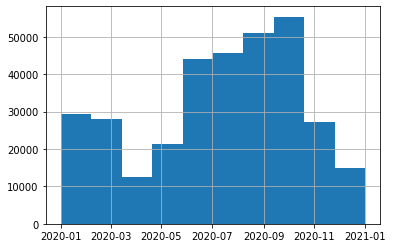

In [34]:
bike_data_excluded['Date'].hist()

In [35]:
bike_data_excluded['weekday']=bike_data_excluded['starttime'].dt.weekday.astype('category')
bike_data_excluded['weekend'] = [ d >=5 for d in bike_data_excluded['weekday']]
bike_data_excluded['starthour']=bike_data_excluded['starttime'].dt.hour.astype('category')
bike_data_excluded['startday']=bike_data_excluded['starttime'].dt.day.astype('category')

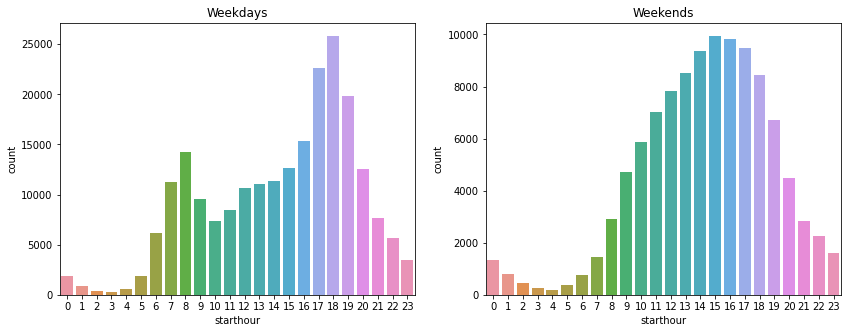

In [36]:
fig, ax =plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=bike_data_excluded[~bike_data_excluded['weekend']],x="starthour" , ax=ax[0]).set_title("Weekdays")
sns.countplot(data=bike_data_excluded[bike_data_excluded['weekend']],x="starthour" , ax=ax[1]).set_title("Weekends") ;

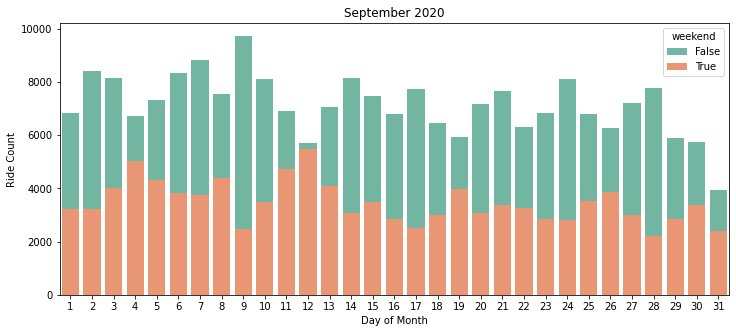

In [37]:
plt.figure(figsize=(12,5))
sns.set_palette("Set2")
ax=sns.countplot(data=bike_data_excluded,x="startday" , hue='weekend' , dodge=False ) 
ax.set(xlabel="Day of Month", ylabel = "Ride Count", title='September 2020') ;

In [38]:
# Creating a new dataframe ndf with selected (useful features)
bike = bike_data_excluded[['trip_length_minute', 'starttime', 'stoptime',
       'start_station_name', 'end_station_name',
      'bikeid', 'usertype','birth_year', 'gender', 'Month']]
bike.loc[:,('birth_year')] = bike['birth_year'].astype(int)
bike.head()


,trip_length_minute,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,29444,Subscriber,1984,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,26305,Subscriber,1989,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,29268,Customer,1989,1,1
3,7.25,2020-01-01 00:32:05.902,2020-01-01 00:39:21.066,Sip Ave,Astor Place,29278,Customer,1969,0,1
4,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,29276,Subscriber,1983,2,1


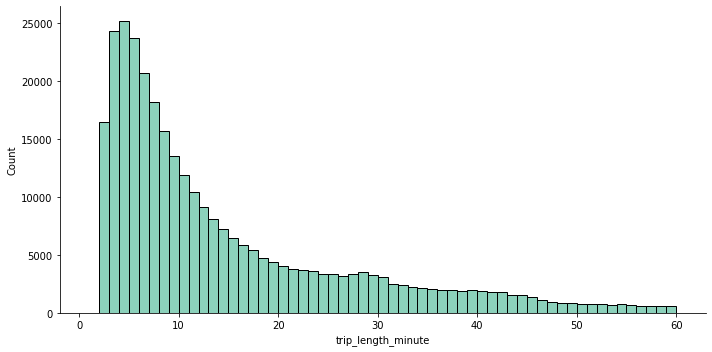

In [39]:
sns.displot(data=bike,x="trip_length_minute", bins=range(1,61), aspect=10/5);

Most riders are using it the max ~15 mins. What about the subcribers vs non-subscribers distribution?

In [40]:
avg_per_cust = pd.DataFrame()
avg_per_cust['Avg. Trip Duration'] = round(bike.groupby('usertype')['trip_length_minute'].mean(),1)
avg_per_cust = avg_per_cust.reset_index()
avg_per_cust['usertype'] = avg_per_cust['usertype'].astype('object')

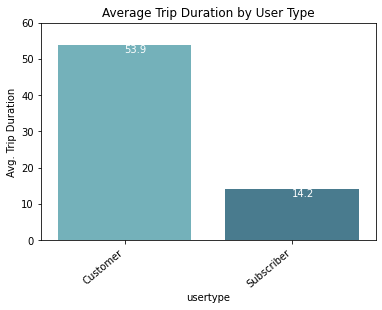

<Figure size 1080x432 with 0 Axes>

In [41]:
from matplotlib.ticker import MultipleLocator

#Average Trip Duration Based on Minutes
ax3 = sns.barplot('usertype', 'Avg. Trip Duration', data = avg_per_cust,palette="GnBu_d",errwidth=0)
ax3.set_title('Average Trip Duration by User Type')
ax3.set_xticklabels(ax3.get_xticklabels(),rotation=40, ha = 'right')
plt.ylim(0, 60)
plt.figure(figsize=(15,6))

for index, row in avg_per_cust.iterrows():
    ax3.text(row.name,row['Avg. Trip Duration']-1,(str(row['Avg. Trip Duration'])), 
             color='white', va='center_baseline', fontsize = 10)
plt.show();

Average trip duration for member customers is 53.9 minutes in 2020 and for casual customers it is 14.2 minutes.

In [42]:
#Identify the 10 most popular trips
trips_df = pd.DataFrame()
trips_df = bike.groupby(['start_station_name','end_station_name']).size().reset_index(name = 'Number of Trips')
trips_df = trips_df.sort_values('Number of Trips', ascending = False)
trips_df["start_station_name"] = trips_df["start_station_name"].astype(str)
trips_df["end_station_name"] = trips_df["end_station_name"].astype(str)
trips_df["Trip"] = trips_df["start_station_name"] + " to " + trips_df["end_station_name"]
trips_df = trips_df[:10]
trips_df = trips_df.drop(['start_station_name', "end_station_name"], axis = 1)
trips_df = trips_df.reset_index()
trips_df.head(10)

,index,Number of Trips,Trip
0,4128,7582,Liberty Light Rail to Liberty Light Rail
1,5455,4884,Newport Pkwy to Newport Pkwy
2,4526,3120,Marin Light Rail to Marin Light Rail
3,3069,2619,JC Medical Center to JC Medical Center
4,4681,2398,McGinley Square to Sip Ave
5,4261,2350,Lincoln Park to Lincoln Park
6,2539,2164,Harborside to Harborside
7,2407,2069,Hamilton Park to Hamilton Park
8,2406,2045,Hamilton Park to Grove St PATH
9,6099,1980,Sip Ave to McGinley Square


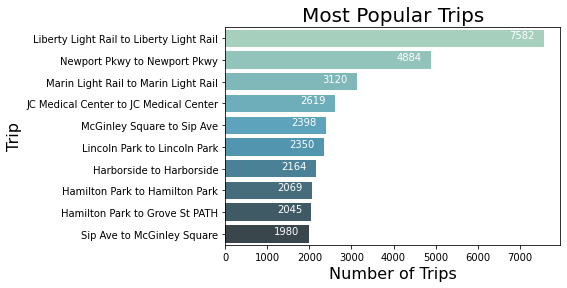

In [43]:
ax4 = sns.barplot('Number of Trips','Trip', data = trips_df,palette="GnBu_d")
ax4.set_title('Most Popular Trips', fontsize = 20)
ax4.set_ylabel("Trip",fontsize=16)
ax4.set_xlabel("Number of Trips",fontsize=16)
for index, row in trips_df.iterrows():
    ax4.text(row['Number of Trips']- 220,index,row['Number of Trips'], 
             color='white', ha="right",fontsize = 10)
plt.show()

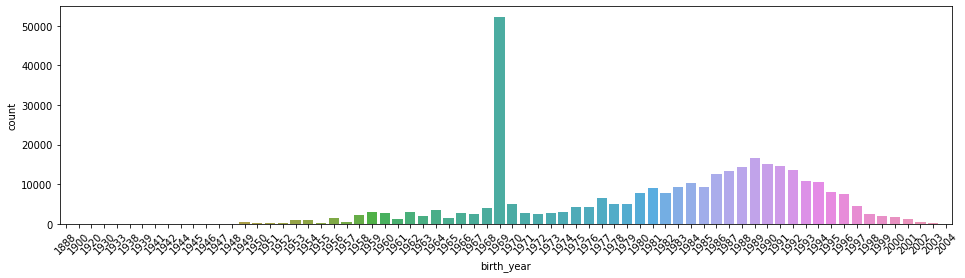

In [44]:
fig_dims = (16, 4)
fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.countplot(x="birth_year",ax = ax, data=bike)

chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

There is a thing with the 1969. Let's dig deeper into this. Since 'You may not ride a Bicycle if You are under 16 years of age' we will set the upper cut off year and the other end we are targeting people max. 60 years old.

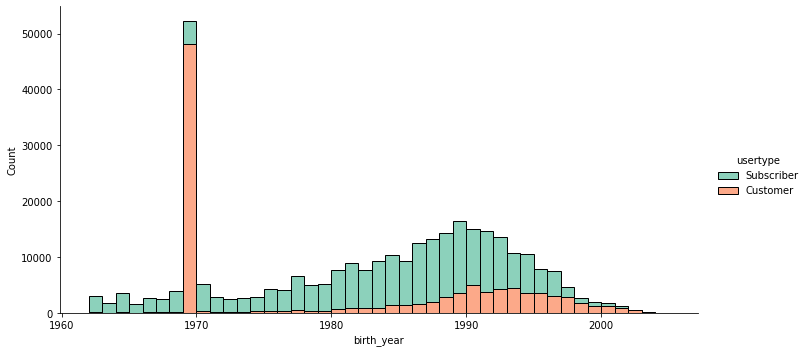

In [45]:
sns.displot(data=bike,x="birth_year", bins=range(1962,2006), 
            hue='usertype', multiple='stack' , hue_order=["Subscriber","Customer"], aspect=10/5); 

Riders who may have not provided their real birth year are havily single ride users. Could they also have not provided their genders either? Let's figure it out.

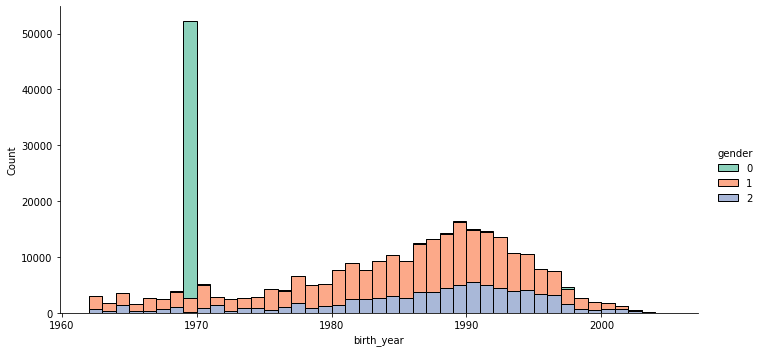

In [46]:
sns.displot(data=bike, x='birth_year', bins=range(1962,2006), hue='gender', multiple='stack',  aspect=10/5) ;

Looks like the unknown gender selection belongs to the people who entered their birth years as 1969 and also they are single ride users.

## Data Processing

In [56]:
masked = bike[(bike['birth_year'] != 1969) & (bike['gender'] != 0)]
masked = masked.reset_index(drop=True)
masked

,trip_length_minute,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,29444,Subscriber,1984,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,26305,Subscriber,1989,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,29268,Customer,1989,1,1
4,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,29276,Subscriber,1983,2,1
5,7.28,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,Newport Pkwy,Harborside,26261,Subscriber,1990,1,1
...,...,...,...,...,...,...,...,...,...,...
336790,9.85,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,Marin Light Rail,Washington St,45256,Customer,1989,2,12
336791,9.75,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,Marin Light Rail,Washington St,44401,Customer,1986,1,12
336795,10.88,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,Grand St,Grand St,38449,Subscriber,1980,1,12
336799,29.35,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,Sip Ave,Jersey & 6th St,40907,Customer,1998,1,12


In [59]:
(masked["birth_year"] == 1969).value_counts()

False    277145
Name: birth_year, dtype: int64

In [63]:
(masked["gender"] == 0).value_counts()

False    277145
Name: gender, dtype: int64

In [62]:
masked = masked.reset_index(drop=True)
masked

,trip_length_minute,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,29444,Subscriber,1984,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,26305,Subscriber,1989,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,29268,Customer,1989,1,1
3,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,29276,Subscriber,1983,2,1
4,7.28,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,Newport Pkwy,Harborside,26261,Subscriber,1990,1,1
...,...,...,...,...,...,...,...,...,...,...
277140,9.85,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,Marin Light Rail,Washington St,45256,Customer,1989,2,12
277141,9.75,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,Marin Light Rail,Washington St,44401,Customer,1986,1,12
277142,10.88,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,Grand St,Grand St,38449,Subscriber,1980,1,12
277143,29.35,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,Sip Ave,Jersey & 6th St,40907,Customer,1998,1,12


In [69]:
bike_data = masked.copy()
bike_data

,trip_length_minute,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,29444,Subscriber,1984,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,26305,Subscriber,1989,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,29268,Customer,1989,1,1
3,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,29276,Subscriber,1983,2,1
4,7.28,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,Newport Pkwy,Harborside,26261,Subscriber,1990,1,1
...,...,...,...,...,...,...,...,...,...,...
277140,9.85,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,Marin Light Rail,Washington St,45256,Customer,1989,2,12
277141,9.75,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,Marin Light Rail,Washington St,44401,Customer,1986,1,12
277142,10.88,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,Grand St,Grand St,38449,Subscriber,1980,1,12
277143,29.35,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,Sip Ave,Jersey & 6th St,40907,Customer,1998,1,12


In [70]:
Usertype = {"Subscriber": 1, "Customer": 2}
data = [bike_data]

for dataset in data:
    dataset['usertype'] = dataset['usertype'].map(Usertype)

bike_data

,trip_length_minute,starttime,stoptime,start_station_name,end_station_name,bikeid,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,Grove St PATH,Newark Ave,29444,1,1984,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,Grove St PATH,Brunswick & 6th,26305,1,1989,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,Grove St PATH,Brunswick & 6th,29268,2,1989,1,1
3,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,Grove St PATH,Marin Light Rail,29276,1,1983,2,1
4,7.28,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,Newport Pkwy,Harborside,26261,1,1990,1,1
...,...,...,...,...,...,...,...,...,...,...
277140,9.85,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,Marin Light Rail,Washington St,45256,2,1989,2,12
277141,9.75,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,Marin Light Rail,Washington St,44401,2,1986,1,12
277142,10.88,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,Grand St,Grand St,38449,1,1980,1,12
277143,29.35,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,Sip Ave,Jersey & 6th St,40907,2,1998,1,12


In [71]:
bike_data = bike_data.drop(columns=['start_station_name','end_station_name','bikeid'])
bike_data

,trip_length_minute,starttime,stoptime,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,1,1984,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,1,1989,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,2,1989,1,1
3,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,1,1983,2,1
4,7.28,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,1,1990,1,1
...,...,...,...,...,...,...,...
277140,9.85,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,2,1989,2,12
277141,9.75,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,2,1986,1,12
277142,10.88,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,1,1980,1,12
277143,29.35,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,2,1998,1,12


In [72]:
data = [bike_data]
for dataset in data:
    dataset['birth_year'] = dataset['birth_year'].astype(int)
    dataset.loc[ dataset['birth_year'] <= 1960, 'birth_year'] = 0
    dataset.loc[(dataset['birth_year'] > 1960) & (dataset['birth_year'] <= 1968), 'birth_year'] = 1
    dataset.loc[(dataset['birth_year'] > 1968) & (dataset['birth_year'] <= 1970), 'birth_year'] = 2
    dataset.loc[(dataset['birth_year'] > 1970) & (dataset['birth_year'] <= 1980), 'birth_year'] = 3
    dataset.loc[(dataset['birth_year'] > 1980) & (dataset['birth_year'] <= 1990), 'birth_year'] = 4
    dataset.loc[(dataset['birth_year'] > 1990) & (dataset['birth_year'] <= 2000), 'birth_year'] = 5
    dataset.loc[ dataset['birth_year'] > 2000, 'birth_year'] = 6
    
bike_data

,trip_length_minute,starttime,stoptime,usertype,birth_year,gender,Month
0,3.77,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,1,4,2,1
1,6.28,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,1,4,2,1
2,4.80,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,2,4,1,1
3,3.85,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,1,4,2,1
4,7.28,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,1,4,1,1
...,...,...,...,...,...,...,...
277140,9.85,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,2,4,2,12
277141,9.75,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,2,4,1,12
277142,10.88,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,1,3,1,12
277143,29.35,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,2,5,1,12


In [75]:
print(bike_data.trip_length_minute.max())
print(bike_data.trip_length_minute.min())

32810.35
2.02


In [81]:
data = [bike_data]
for dataset in data:
    dataset['trip_length_minute'] = dataset['trip_length_minute'].astype(int)
    dataset.loc[ dataset['trip_length_minute'] <= 3, 'trip_length_minute'] = 0
    dataset.loc[(dataset['trip_length_minute'] > 3) & (dataset['trip_length_minute'] <= 4), 'trip_length_minute'] = 1
    dataset.loc[(dataset['trip_length_minute'] > 4) & (dataset['trip_length_minute'] <= 5), 'trip_length_minute'] = 2
    dataset.loc[(dataset['trip_length_minute'] > 5) & (dataset['trip_length_minute'] <= 6), 'trip_length_minute'] = 3
    dataset.loc[(dataset['trip_length_minute'] > 6) & (dataset['trip_length_minute'] <=9), 'trip_length_minute'] = 4
    dataset.loc[(dataset['trip_length_minute'] > 9) & (dataset['trip_length_minute'] <= 15), 'trip_length_minute'] = 5
    dataset.loc[(dataset['trip_length_minute'] > 15) & (dataset['trip_length_minute'] <= 30), 'trip_length_minute'] = 6
    dataset.loc[(dataset['trip_length_minute'] > 30) & (dataset['trip_length_minute'] <= 40), 'trip_length_minute'] = 7
    dataset.loc[ dataset['trip_length_minute'] > 40, 'trip_length_minute'] = 8
    
bike_data

,trip_length_minute,starttime,stoptime,usertype,birth_year,gender,Month
0,0,2020-01-01 00:04:50.192,2020-01-01 00:08:37.037,1,4,2,1
1,3,2020-01-01 00:16:01.670,2020-01-01 00:22:19.080,1,4,2,1
2,1,2020-01-01 00:17:33.877,2020-01-01 00:22:22.442,2,4,1,1
3,0,2020-01-01 00:46:19.678,2020-01-01 00:50:11.344,1,4,2,1
4,4,2020-01-01 00:47:21.085,2020-01-01 00:54:38.746,1,4,1,1
...,...,...,...,...,...,...,...
277140,4,2020-12-31 22:10:54.854,2020-12-31 22:20:46.176,2,4,2,12
277141,4,2020-12-31 22:11:08.430,2020-12-31 22:20:53.898,2,4,1,12
277142,5,2020-12-31 22:38:25.468,2020-12-31 22:49:18.515,1,3,1,12
277143,6,2020-12-31 23:31:09.462,2021-01-01 00:00:31.329,2,5,1,12


In [82]:
bike_data.trip_length_minute.value_counts()

6    45177
5    44330
4    41692
0    39173
8    25191
1    23864
2    22127
3    19051
7    16540
Name: trip_length_minute, dtype: int64

In [83]:
bike_data = bike_data.drop(columns=['starttime','stoptime'])
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277145 entries, 0 to 277144
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   trip_length_minute  277145 non-null  int32   
 1   usertype            277145 non-null  category
 2   birth_year          277145 non-null  int32   
 3   gender              277145 non-null  category
 4   Month               277145 non-null  int64   
dtypes: category(2), int32(2), int64(1)
memory usage: 4.8 MB


In [84]:
bike_data['usertype'] = bike_data['usertype'].astype(int)

In [85]:
bike_data['gender'] = bike_data['gender'].astype(int)

In [86]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277145 entries, 0 to 277144
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   trip_length_minute  277145 non-null  int32
 1   usertype            277145 non-null  int32
 2   birth_year          277145 non-null  int32
 3   gender              277145 non-null  int32
 4   Month               277145 non-null  int64
dtypes: int32(4), int64(1)
memory usage: 6.3 MB


In [87]:
bike_data.to_pickle('bike_data.pkl')